In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')
#Biclassification Dataset problem

In [3]:
df.shape

(10000, 14)

In [4]:
df.head(6)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#One HOT Encoding of Categorical Columns

In [15]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [16]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [24]:
#Now we will make sequential model


In [107]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\pk629\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [111]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6993 - loss: 0.6030 - val_accuracy: 0.8025 - val_loss: 0.4778
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.4667 - val_accuracy: 0.8106 - val_loss: 0.4379
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8168 - loss: 0.4216 - val_accuracy: 0.8213 - val_loss: 0.4184
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8293 - loss: 0.4040 - val_accuracy: 0.8263 - val_loss: 0.4008
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.8417 - loss: 0.3923 - val_accuracy: 0.8388 - val_loss: 0.3856
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8351 - loss: 0.3939 - val_accuracy: 0.8475 - val_loss: 0.3761
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8565 - loss: 0.3703 - val_accuracy: 0.8487 - val_loss: 0.3662
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8516 - loss: 0.3697 - val_

In [112]:
model.layers[0].get_weights()

[array([[-0.21599947,  0.0794411 , -0.38312262, -0.10207069,  0.36096355,
         -0.15739837, -0.1191593 , -0.15572152,  0.31450438, -0.26118174,
          0.00176643],
        [ 0.6638173 ,  1.095609  , -0.03142619,  0.24771833, -0.26516676,
         -0.10240892, -0.10294595,  1.3306003 , -0.7380063 ,  0.10973469,
         -0.3535458 ],
        [ 0.14898965, -0.2313935 , -0.06029269, -0.13573556, -0.60177505,
          0.05267162,  0.07064892,  0.21335557, -0.05900857,  0.2921163 ,
         -0.27579692],
        [-0.27929834,  0.00780943, -1.0134052 ,  0.91041046, -0.37049234,
          0.46806845, -0.14009473, -0.28011125,  0.13685414, -0.10570706,
         -0.3323413 ],
        [-0.04709943,  0.56399095, -0.5236695 , -0.17426369, -0.74672025,
          1.3735535 ,  0.1917217 , -0.56888115, -0.44534636,  0.27382937,
          0.56774527],
        [-0.14708824,  0.24785823,  0.14345494,  0.0173734 , -0.24635318,
         -0.29712468, -0.36450312, -0.07020355,  0.07915231,  0.7252702

In [113]:
model.layers[1].get_weights()

[array([[ 0.5680963 ,  0.8417173 , -0.0923848 ,  0.07868312, -0.07494371,
         -0.6795859 , -0.3451705 ,  0.11732035, -0.16197392,  0.05647931,
         -0.06431597],
        [ 0.36334768,  0.8411855 ,  0.73747724, -0.49445784, -0.6313611 ,
          0.8459939 ,  0.13919204,  0.7072838 ,  0.29493308,  0.04669711,
         -0.38091755],
        [-0.93983656, -0.6001149 , -0.5484495 ,  0.14949925,  0.11416912,
          0.10545924,  0.8310287 , -0.1159258 , -0.30910888, -0.35468826,
          0.11853902],
        [-0.5160061 , -0.47457722, -0.7434972 ,  0.26342943,  0.03026607,
         -0.616501  ,  0.3070681 , -0.04016639, -0.38496765,  0.01315944,
         -0.18732667],
        [ 0.11197424,  0.23865968, -0.7986723 ,  0.18163234,  0.21626343,
         -0.82696456,  0.5636474 , -0.3995184 ,  0.3473057 ,  0.29262972,
          0.13835731],
        [ 0.2648976 , -0.06035344,  0.89057314,  0.4247591 ,  0.22956876,
          0.5595804 , -0.8249261 ,  0.2835334 ,  0.21092726,  0.4460764

In [114]:
model.predict(X_test_scaled)
#Notice here no prediction will be 0 or 1 as we have used sigmoid activation function
#We will use threshold to convert the values to 0 or 1 say if threshold is 0.5 then if value is greater than 0.5 then 1 else 0
#Generally threshold is assumed using ROC curve but we'll not do that here

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.03409496],
       [0.13100848],
       [0.04147978],
       ...,
       [0.01126664],
       [0.01691203],
       [0.60049725]], dtype=float32)

In [115]:
y_log=model.predict(X_test_scaled)
y_pred=np.where(y_log>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step


In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8615

In [102]:
# You can increase the performance by (i)Increasing the number of neurons in hidden layer
# (ii)Increasing the number of hidden layers
# (iii)Increasing the number of epochs (iv)Using different activation functions
# (v)Using different optimizers
# (vi)Using different loss functions(Relu insted of sigmoid)

In [117]:
import matplotlib.pyplot as plt


In [118]:
history.history

{'accuracy': [0.76171875,
  0.8051562309265137,
  0.8167187571525574,
  0.8295312523841858,
  0.8382812738418579,
  0.8464062213897705,
  0.8540624976158142,
  0.8564062714576721,
  0.860156238079071,
  0.8604687452316284,
  0.8607812523841858,
  0.8629687428474426,
  0.8615624904632568,
  0.8620312213897705,
  0.8629687428474426,
  0.864062488079071,
  0.862500011920929,
  0.8639062643051147,
  0.8637499809265137,
  0.8639062643051147,
  0.8646875023841858,
  0.8650000095367432,
  0.8660937547683716,
  0.8620312213897705,
  0.8646875023841858,
  0.8656250238418579,
  0.8659374713897705,
  0.8657812476158142,
  0.8650000095367432,
  0.8653125166893005,
  0.8646875023841858,
  0.8654687404632568,
  0.8654687404632568,
  0.8654687404632568,
  0.8637499809265137,
  0.8639062643051147,
  0.8645312786102295,
  0.8675000071525574,
  0.8667187690734863,
  0.8673437237739563,
  0.866406261920929,
  0.8656250238418579,
  0.8657812476158142,
  0.8654687404632568,
  0.8662499785423279,
  0.864843

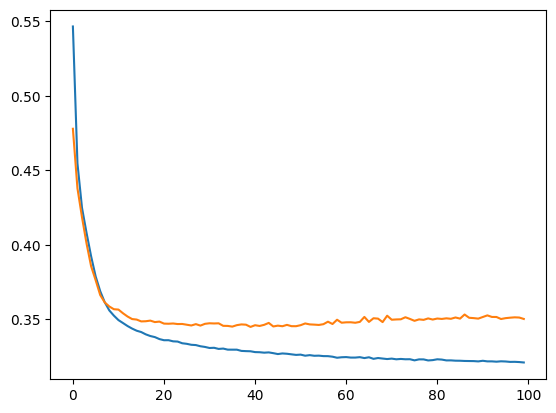

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

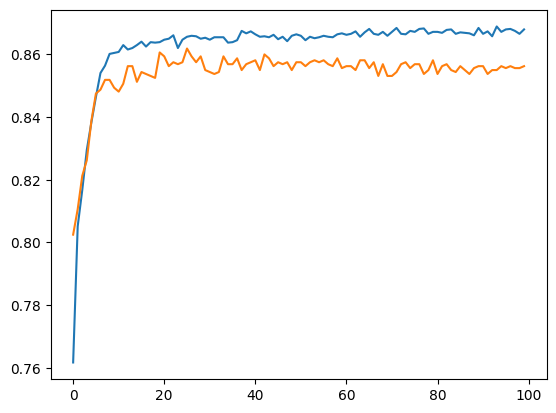

In [120]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])